In [1]:
import sys
import numpy as np
import matplotlib

calculating forward feed onto a single neuron, from lets say 3 neurons from the previous layer.

In [2]:
inputs = [1.2,5.4,3.3]
weights = [0.4,0.6,0.8]
bias = 3

output = np.dot(inputs, weights) + bias
print("Output:", output)

Output: 9.36


In [3]:
#same as the above.
output = 0

for i in range(3):
    output += inputs[i] * weights[i]
output += bias
print("Output:", output)

Output: 9.36


now this is how it would work for a single layer.

In [4]:
inputs = [1,2,3,2.5] #lets say there are 4 neurons in the previous layer.

#weights from each of the 4 previous layer neurons to 3 neurons in the current layer.
weights = [[0.2, 0.8, -0.5,1], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
bias = [2, 3, 0.5]  #3 neurons in the current layer.

outputs= [] # this would store the outputs of the 3 neurons in the current layer.

for i in zip(weights,bias):
    print(i)

for i in zip(weights, bias):
    outputs.append(np.dot(i[0], inputs) + i[1])


([0.2, 0.8, -0.5, 1], 2)
([0.5, -0.91, 0.26, -0.5], 3)
([-0.26, -0.27, 0.17, 0.87], 0.5)


In [5]:
for i in outputs:
    print(i)

4.8
1.21
2.385


In [6]:
#np.dot sorts all of that out. and just add bias, it directly takes care of things.
outputs = np.dot(weights,inputs)+bias

In [7]:
for i in outputs:
    print(i)

4.8
1.2099999999999997
2.385


In [8]:
#batch wise inputs so.
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

#samples, number of classes is what the spiral data function takes in.
x,y = spiral_data(100,3)


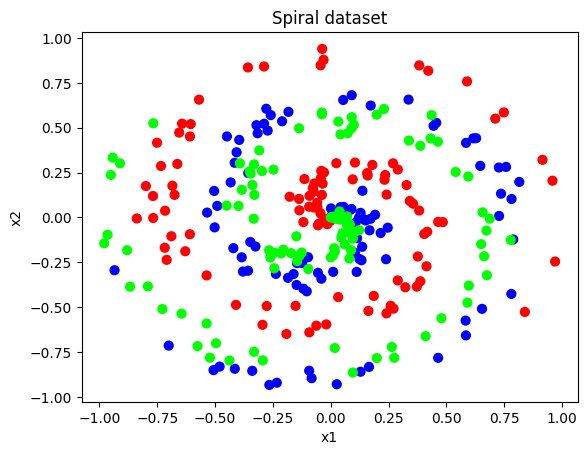

In [9]:
import matplotlib.pyplot as plt
# In Jupyter: render plots inline
%matplotlib inline

# x is (n_samples, 2) from spiral_data; y are class labels
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='brg', s=40)
plt.title('Spiral dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [10]:
import layer_dense as ld

ld1 = ld.layer_dense(2,5)
ac1 = ld.Ac_relu()

l1 = ld1.forward_pass(x)

relu_out = ac1.forward_pass(l1)
print(relu_out.shape)


(300, 2)   (2, 5)
(300, 5)


In [11]:
#for softmax activation. yo numpy is fuckin goated. its the same thing what the fuck.
#my good dawg, epsilon is different from euler's number.
# import sys 

# euler_num = sys.float_info.epsilon
import math 

euler_num = math.e
inputs = x
sum1 = np.sum(np.float_power(euler_num,inputs), axis=1, keepdims=True)

outputs = np.divide(np.float_power(euler_num,inputs),sum1)
print(outputs)

print(inputs.shape)
print(outputs.shape)

[[0.5        0.5       ]
 [0.49833724 0.50166276]
 [0.49932953 0.50067047]
 [0.50638133 0.49361867]
 [0.50749548 0.49250452]
 [0.4875852  0.5124148 ]
 [0.50624398 0.49375602]
 [0.49616532 0.50383468]
 [0.49917368 0.50082632]
 [0.51038299 0.48961701]
 [0.51044043 0.48955957]
 [0.53407825 0.46592175]
 [0.53091818 0.46908182]
 [0.52575176 0.47424824]
 [0.53751374 0.46248626]
 [0.54175058 0.45824942]
 [0.5568911  0.4431089 ]
 [0.54464842 0.45535158]
 [0.55937995 0.44062005]
 [0.54394793 0.45605207]
 [0.49702312 0.50297688]
 [0.57412978 0.42587022]
 [0.57453925 0.42546075]
 [0.57495553 0.42504447]
 [0.53078485 0.46921515]
 [0.57515884 0.42484116]
 [0.58797161 0.41202839]
 [0.59168626 0.40831374]
 [0.53257567 0.46742433]
 [0.52690083 0.47309917]
 [0.57764233 0.42235767]
 [0.56277911 0.43722089]
 [0.60230507 0.39769493]
 [0.61570633 0.38429367]
 [0.57451869 0.42548131]
 [0.53846619 0.46153381]
 [0.45909842 0.54090158]
 [0.44733484 0.55266516]
 [0.53772766 0.46227234]
 [0.51925319 0.48074681]


In [39]:
import network
from network import NeuralNetwork
import nnfs
from nnfs.datasets import spiral_data
import layer_dense as ld

#100 samples per class and 3 classes of spiral data. each sample has 2 datapoints. 
x,y = spiral_data(100,3)

nn = NeuralNetwork()
# here 2 is the shape of the input.
nn.add(ld.layer_dense(2, 64))
nn.add(ld.Ac_relu())
nn.add(ld.layer_dense(64, 64))
nn.add(ld.Ac_relu())
nn.add(ld.layer_dense(64, 3))
nn.add(ld.Ac_softmax())


out = nn.forward(x)
print(out.shape)

(300, 2)   (2, 64)
(300, 64)   (64, 64)
(300, 64)   (64, 3)
(300, 3)


In [ ]:
# One-hot encode labels using numpy (handles any number of classes).
# Produces a (n_samples, num_classes) array appropriate for loss calculations.
num_classes = np.max(y) + 1
#np.eye makes u an identity matrix, and u know what the rest is.
ohenc_input = np.eye(num_classes)[y]
# quick sanity checks
print('ohenc_input shape:', ohenc_input.shape)
print('first 5 rows:\n', ohenc_input[:5])

[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]

In [ ]:
#we doing cateogrical cross entropy loss here. 
#close to 1 meaning we doing it with a confidence of 0.333 which is fair. its okay, alright.
out1 = -np.mean(np.sum(np.multiply(ohenc_input,np.log(out)), axis = 1))
print(out1)

1.0989999163871076
